## Week 5 Grinstead, Snell

## Chapter 1

In [2]:
import random

random.seed(42)


In [3]:
# 1


def coin_tosses_1(n):
    x = [random.randint(0, 1) for x in range(n)]

    heads = x.count(1)
    tails = x.count(0)
    print(f"Heads: {tails}")
    print(f"Tails: {tails}")

    h_prop = heads / len(x)
    t_prop = tails / len(x)

    print(h_prop - 0.5)
    print(t_prop - 0.5)

    return None


coin_tosses_1(10**6)

Heads: 499579
Tails: 499579
0.0004210000000000047
-0.0004210000000000047


In [4]:
# 2


def coin_tosses_2(n):
    # Set thresholds
    l_thresh = 0.4
    h_thresh = 0.6

    # Init counters
    in_thresh = 0
    counter = 0

    while in_thresh < 95:
        counter += 1

        # Random sample of coin flips of size n
        x = [random.randint(0, 1) for x in range(n)]
        heads = x.count(1)
        h_prop = heads / len(x)

        # Increment if within threshold
        if h_prop > l_thresh and h_prop < h_thresh:
            in_thresh += 1

    print(counter)

    return None


coin_tosses_2(50)


126


In [5]:
# 3


def galileo_figero(n):
    dice = 3
    nine, ten = 0, 0

    for i in range(n):
        nine += sum(random.randint(1, 6) for die in range(dice)) == 9
        ten += sum(random.randint(1, 6) for die in range(dice)) == 10
    print(nine / n)
    print(ten / n)


galileo_figero(10000)

0.122
0.1286


In [6]:
# 4


def federer():
    my_serve_rate = 0.6
    op_serve_rate = 0.5

    my_points = 0
    op_points = 0

    my_serve = True

    win_score = 21

    # While the game is ongoing
    while my_points < win_score and op_points < win_score:
        # A serve happens
        serve = random.random()

        # If its my serve
        if my_serve:
            print("It's your serve")
            # And I score, give me a point
            if serve >= my_serve_rate:
                print("Won serve and point!")
                my_points += 1
            else:
                print("Lost serve")
                my_serve = False  # Otherwise I lose my serve

        else:
            print("Your opponent serves")
            if serve >= op_serve_rate:
                print("They won the point")
                op_points += 1

            else:
                my_serve = True
                print("You won the point")

        print(f"Score is {my_points} - {op_points}")

    if my_points == win_score:
        print("You're the best")
    else:
        print("Good thing you're in a master's program")


federer()

It's your serve
Lost serve
Score is 0 - 0
Your opponent serves
You won the point
Score is 0 - 0
It's your serve
Won serve and point!
Score is 1 - 0
It's your serve
Lost serve
Score is 1 - 0
Your opponent serves
They won the point
Score is 1 - 1
Your opponent serves
They won the point
Score is 1 - 2
Your opponent serves
They won the point
Score is 1 - 3
Your opponent serves
They won the point
Score is 1 - 4
Your opponent serves
You won the point
Score is 1 - 4
It's your serve
Lost serve
Score is 1 - 4
Your opponent serves
You won the point
Score is 1 - 4
It's your serve
Won serve and point!
Score is 2 - 4
It's your serve
Lost serve
Score is 2 - 4
Your opponent serves
They won the point
Score is 2 - 5
Your opponent serves
You won the point
Score is 2 - 5
It's your serve
Lost serve
Score is 2 - 5
Your opponent serves
They won the point
Score is 2 - 6
Your opponent serves
They won the point
Score is 2 - 7
Your opponent serves
You won the point
Score is 2 - 7
It's your serve
Won serve and p

In [7]:
# 5


def demoivre():
    dice = 3

    triple_six = False

    print(f"Probability of a triple six {((1 / 6) ** 3):.4f}")

    attempts = 0

    while triple_six == False:
        attempts += 1
        result = [random.randint(1, 6) for die in range(dice)]

        # Check if all results are 6
        if all(die == 6 for die in result):
            triple_six = True

    print(f"Number of attempts to get triple six: {attempts:,}")


demoivre()

Probability of a triple six 0.0046
Number of attempts to get triple six: 24


## Chapter 2

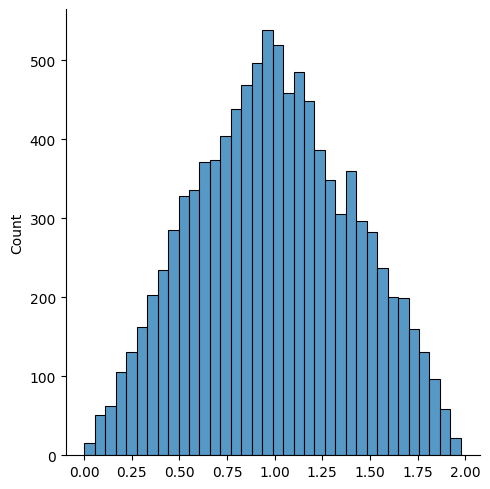

In [8]:
# Example 2.4

import matplotlib.pyplot as plt
import random
import seaborn as sns

v = []

for i in range(10000):
    x = random.random()
    y = random.random()
    z = x + y
    v.append(z)

sns.displot(v)

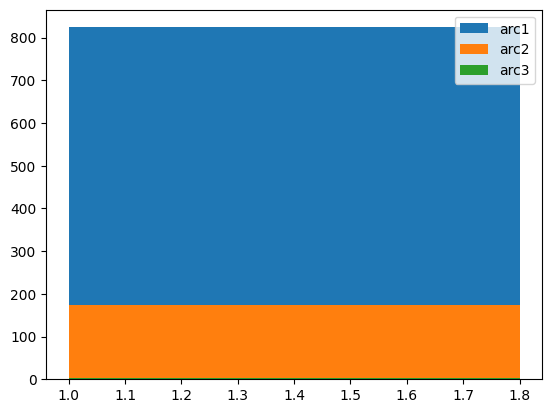

In [9]:
# Exercise 1

import math


def exercise_2_1(n):
    # This is one way to do it but not sure if it's a great way!
    # Divide unit circle into arcs of 1/2, 1/3, 1/6
    unit_circle_circumf = 2 * math.pi * 1  # unit circle, so radius of 1

    # Do I even need this? Can I not say that it is simply just a .5, .33, and .1667 chance respectively?
    # arc1 = (1/2) * unit_circle_circumf
    # arc2 = (1/3) * unit_circle_circumf
    # arc3 = (1/6) * unit_circle_circumf

    arc1 = 0.5
    arc2 = arc1 + 0.33  # Add each arc to each other to complete the circle
    arc3 = arc2 + 0.167

    results = {"arc1": [], "arc2": [], "arc3": []}

    # Simulate a spin between 0 and 1
    for i in range(n):
        x = random.random()

        # Track results
        if x > 0 and x <= arc2:
            results["arc1"].append(1)
        elif x > arc1 and x <= arc3:
            results["arc2"].append(1)
        else:
            results["arc3"].append(1)

    plt.subplot()

    for arc in results:
        plt.bar(results[arc], height=sum(results[arc]), label=arc, align="edge")

    plt.legend()


exercise_2_1(1000)

### Chapter 2, Exercise 3 - Grinstead & Snell

I found it fantastically satisfying to see how early scientists and mathematicians used simulation to estimate pi. The only thing more satisfying than "discovering" natural phenomena yourself is proving a bunch of your friends wrong by dumping a box of pins on the floor.

In that spirit, I generally find simulating probabilities to be extremely useful in locking down the concepts in my head, so I used Exercse 3 from Chapter 2 in Grinstead & Snell for this week's discussion.

Firstly a reminder on some basic geometery. We calculate a circle's area as $A = \pi r^2$. We use simulation to estimate $A$, which give us a way to solve for $\pi$.

To do this, we set up a function that simulates multiple coordinates within the unit square (1, 1). We then calculate the ratio of coordinates that are within a circle of a given radius ($0 < r \le 1$). This is our estimate for the area of the circle. From there it is simple algebra!

Ratio of hits in the circle:0.788
Area of the circle 0.7853981633974483
Our pi estimate: 3.152


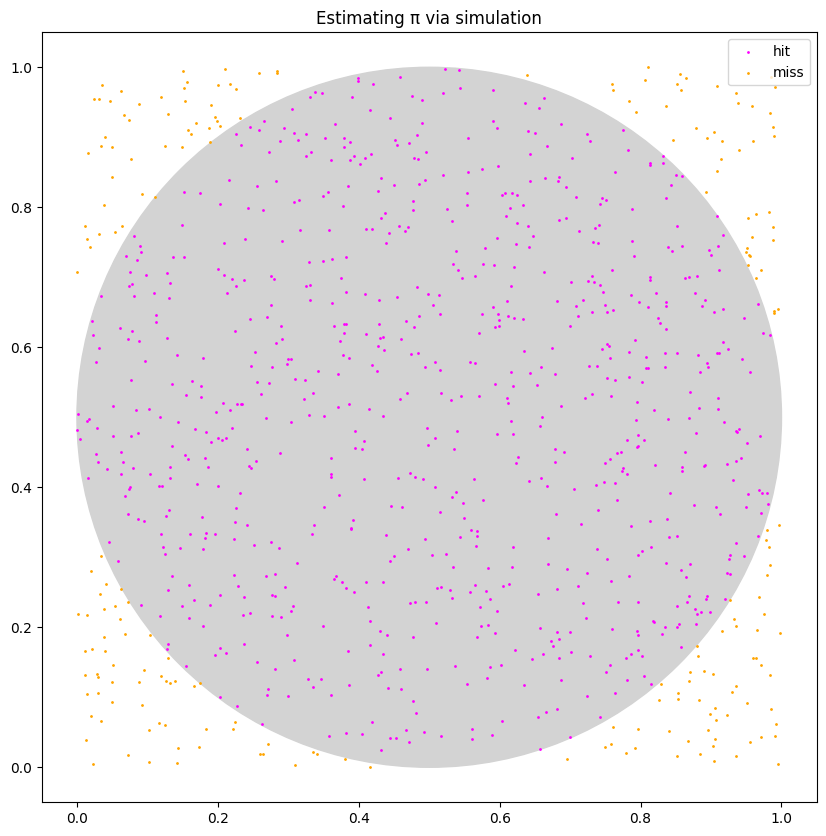

In [10]:
# Exercise 3
import math
import random
import matplotlib.pyplot as plt


def exercise_2_3(n, radius):
    """Estimates pi through simulating random points in the unit square"""

    # Radius of our circle
    r = radius
    hit = 0  # if we land in the circle
    miss = 0  # we land in the unit square, outside circle

    # Keep track of results for plotting later
    x_hit = []
    y_hit = []

    x_miss = []
    y_miss = []

    for i in range(n):
        # Get random coord
        x = random.random()
        y = random.random()

        # Circle is represented on coord system by r**2 = x**2 + y**2
        if (x - 0.5) ** 2 + (y - 0.5) ** 2 < r**2:
            hit += 1
            x_hit.append(x)
            y_hit.append(y)
        else:
            miss += 1
            x_miss.append(x)
            y_miss.append(y)

    # This should be close to the area of the circle
    ratio = hit / (miss + hit)
    print(f"Ratio of hits in the circle:{ratio}")
    print(f"Area of the circle {math.pi * (r**2)}")

    # If we didn't know pi, we could estimate using the information we now have
    estimate_pi = ratio / (r**2)
    print(f"Our pi estimate: {estimate_pi}")

    # plot simulation
    plt.figure(figsize=(10, 10))

    # draw the circle
    circle = plt.Circle(xy=(0.5, 0.5), radius=r, color="lightgrey")
    plt.gca().add_patch(circle)

    # color code coordinates
    plt.scatter(x=x_hit, y=y_hit, s=1, c="magenta", label="hit")
    plt.scatter(x=x_miss, y=y_miss, s=1, c="orange", label="miss")

    # Restrict to unit square
    plt.xlim = (0, 1)
    plt.ylim = (0, 1)
    plt.legend()
    plt.title("Estimating π via simulation")


exercise_2_3(n=1000, radius=0.5)

## Chapter 5

$$
\binom{n}kp^kq^{n-k} = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
$$

In [11]:
# binomial distribution simulation
import math


def binomial_dist(n):
    p = 0.5
    q = 0.5
    k = 10

    n_choose_k = math.factorial(n) / (math.factorial(k) * (math.factorial(n - k)))

    print(n_choose_k * p**k * q ** (n - k))


binomial_dist(1000)

2.4583055954508074e-278


In [12]:
# geometric distribution


def geometric(p, n):
    # Target success

    samples = []

    for i in range(n):
        k = 1
        while random.random() < p:
            k += 1
        samples.append(k)

    max_k = max(samples)
    counts = ...

    plt.figure(figsize=(10, 6))  # Optional: set the figure size
    plt.bar(k_trials, P_list)

    # Add labels and title (optional)
    plt.xlabel("Number of trials")
    plt.ylabel("Target P value")
    plt.title("Bar Chart of List Values")

    # Set the x-tick positions to match your list indices
    plt.xticks(k_trials)

    # Display the chart
    plt.show()


# Not working as expected

geometric(50)

TypeError: geometric() missing 1 required positional argument: 'n'

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (100,).

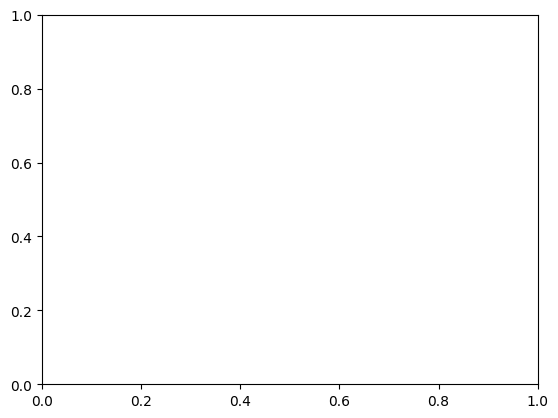

In [ ]:
# Negative binomial


def neg_binom(n):
    # Probability of coin coming heads up
    p = 0.5
    results = []

    for i in range(n):
        k = 0
        X = 0
        while k < 10:
            X += 1
            x = random.random()
            if x > p:
                k += 1
                results.append(X)

    plt.subplot()
    plt.bar(x=list(range(n)), height=results)
    plt.show()

    # "X has a negative binomial distrubtion for a given k"


neg_binom(10)


### Exercises

1. Choose a number U from the unit interval [0, 1] with uniform distribution. Find the cumulative distribution and density for the random variables (a) Y = U + 2. (b) Y = U 3.

2. Choose a number U from the interval [0, 1] with uniform distribution. Find the cumulative distribution and density for the random variables (a) Y = 1/(U + 1). (b) Y = log(U + 1).

C:\Users\Kevin\AppData\Local\Temp\ipykernel_30660\78817673.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


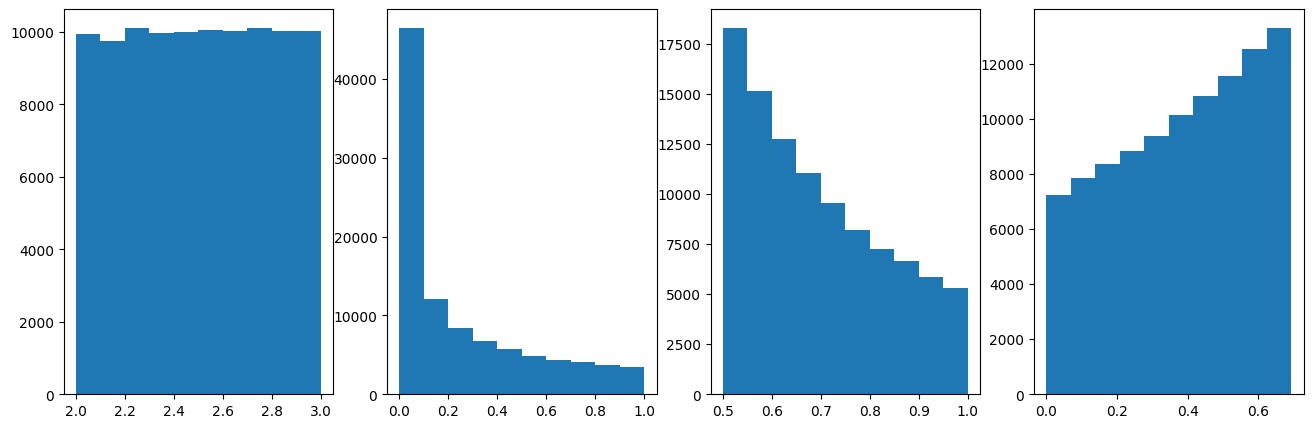

In [ ]:
def exercise_5_1(n):
    # Exc 1
    a_list = [(random.random() + 2) for i in range(n)]
    b_list = [(random.random() ** 3) for i in range(n)]

    # Exc 2
    c_list = [(1 / (random.random() + 1)) for i in range(n)]
    d_list = [(math.log(random.random() + 1)) for i in range(n)]

    fig, axes = plt.subplots(1, 4, figsize=(16, 5))

    axes[0].hist(a_list)
    axes[1].hist(b_list)
    axes[2].hist(c_list)
    axes[3].hist(d_list)
    fig.show()


exercise_5_1(100000)

3. Use Corollary 5.2 to derive the expression for the random variable given in Equation 5.5. Hint: The random variables 1 − rnd and rnd are identically distributed.

Corollary 5.2 If $F(y)$ is a given cumulative distribution function that is strictly increasing when $0 < F(y) < 1$ and if U is a random variable with uniform distribution on [0, 1], then $Y = F^{−1}(U)$ has the cumulative distribution $F(y)$. Thus, to simulate a random variable with a given cumulative distribution F we need only set $Y = F^{−1}(rnd)$.

Equation 5.5
$$
Y = -\frac{1}{\lambda}log(rnd)
$$

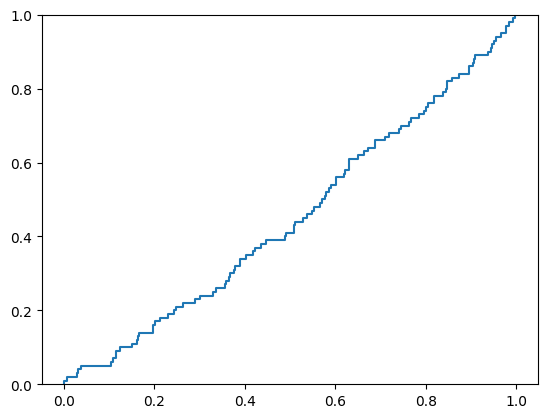

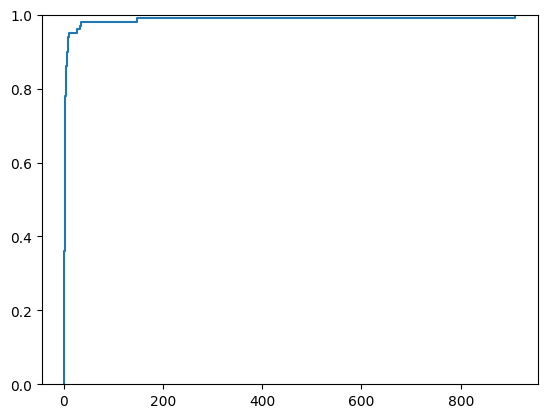

In [ ]:
def ex_5_3(n):
    samples = [random.random() for _ in range(n)]
    plt.ecdf(samples)
    plt.show()

    return samples


samples = ex_5_3(100)

inv_samples = [x**-1 for x in samples]
plt.ecdf(inv_samples)

In [ ]:
# Claude example
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n_samples = 10000

# Example 1: Exponential Distribution
# -----------------------------------------
# The CDF of the exponential distribution with rate λ is:
# F(y) = 1 - e^(-λy) for y ≥ 0

# The inverse CDF is:
# F^(-1)(u) = -ln(1-u)/λ


def exponential_inverse_cdf(u, lambda_param=1.0):
    """Inverse CDF of exponential distribution"""
    return -np.log(1 - u) / lambda_param


# Generate uniform random variables
uniform_samples = np.random.uniform(0, 1, n_samples)

# Transform to exponential using the inverse CDF
lambda_param = 0.5  # Rate parameter
exponential_samples = exponential_inverse_cdf(uniform_samples, lambda_param)

# Example 2: Triangular Distribution
# -----------------------------------------
# Consider a triangular distribution on [0,1] with mode at c=0.3
# The CDF is piecewise:
# F(y) = y²/(2c) for 0 ≤ y ≤ c
# F(y) = 1 - (1-y)²/(2(1-c)) for c ≤ y ≤ 1


def triangular_inverse_cdf(u, c=0.3):
    """Inverse CDF of triangular distribution with mode at c"""
    if u < c:
        return np.sqrt(2 * c * u)
    else:
        return 1 - np.sqrt(2 * (1 - c) * (1 - u))


# Generate triangular distribution samples
triangular_samples = np.array([triangular_inverse_cdf(u, 0.3) for u in uniform_samples])

# Example 3: Normal Distribution
# -----------------------------------------
# The normal distribution's CDF has no closed-form inverse
# But scipy provides this function

# Generate normal distribution samples using inverse CDF
normal_samples = stats.norm.ppf(uniform_samples, loc=0, scale=1)

# Plot the distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# First row: uniform distributions (our U)
axes[0, 0].hist(uniform_samples, bins=30, alpha=0.7, color="blue")
axes[0, 0].set_title("Uniform Distribution [0,1]")
axes[0, 0].set_xlabel("Value")
axes[0, 0].set_ylabel("Frequency")

# Plot uniform CDF
sorted_uniform = np.sort(uniform_samples)
axes[0, 1].plot(sorted_uniform, np.linspace(0, 1, len(sorted_uniform)))
axes[0, 1].set_title("Uniform CDF")
axes[0, 1].set_xlabel("Value")
axes[0, 1].set_ylabel("Probability")

# Second row: exponential distributions (our Y = F^(-1)(U))
axes[1, 0].hist(exponential_samples, bins=30, alpha=0.7, color="green")
axes[1, 0].set_title(f"Exponential Distribution (λ={lambda_param})")
axes[1, 0].set_xlabel("Value")
axes[1, 0].set_ylabel("Frequency")

# Plot exponential CDF
sorted_exp = np.sort(exponential_samples)
axes[1, 1].plot(sorted_exp, np.linspace(0, 1, len(sorted_exp)))
axes[1, 1].set_title("Exponential CDF")
axes[1, 1].set_xlabel("Value")
axes[1, 1].set_ylabel("Probability")

# Third row: triangular distributions
axes[2, 0].hist(triangular_samples, bins=30, alpha=0.7, color="red")
axes[2, 0].set_title("Triangular Distribution (mode=0.3)")
axes[2, 0].set_xlabel("Value")
axes[2, 0].set_ylabel("Frequency")

# Plot triangular CDF
sorted_tri = np.sort(triangular_samples)
axes[2, 1].plot(sorted_tri, np.linspace(0, 1, len(sorted_tri)))
axes[2, 1].set_title("Triangular CDF")
axes[2, 1].set_xlabel("Value")
axes[2, 1].set_ylabel("Probability")

plt.tight_layout()
plt.show()

# Validation: compare our generated samples with direct methods
print("Validation - comparing means:")
print(
    f"Exponential: Our method: {np.mean(exponential_samples):.4f}, Expected: {1 / lambda_param:.4f}"
)
print(
    f"Triangular: Our method: {np.mean(triangular_samples):.4f}, Expected: {(0 + 1 + 0.3) / 3:.4f}"
)
print(f"Normal: Our method: {np.mean(normal_samples):.4f}, Expected: 0.0000")

ModuleNotFoundError: No module named 'scipy'

In [ ]:
p = 0
r = 365
while p < 0.5:
    p = (365) / (365**r)
    r -= 1

In [ ]:
print(r)

0


In [ ]:
def stirlings(n, e)

## Chapter 6

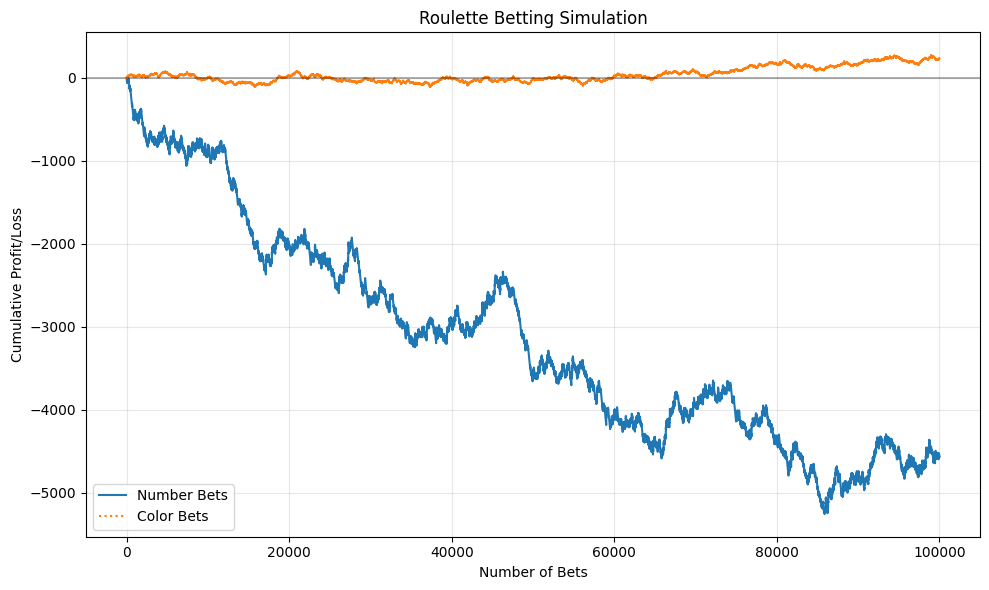

In [ ]:
# Exercise 4

import random
import matplotlib.pyplot as plt
import numpy as np


def roulette(n, payout=36):
    bet = 1
    num_net = payout - bet  # value of winning on the number
    color_net = 2 - bet  # color bets pay 1:1 (double your money)

    number_bets = []
    color_bets = []

    for _ in range(n):
        number_bet = random.randint(1, 38)  # The bettor's number bet
        color_bet = random.randint(
            0, 1
        )  # The bettor's color bet (0 for black, 1 for red)

        number = random.randint(1, 38)  # The actual outcome number
        color = random.randint(
            0, 1
        )  # The actual outcome color (0 for black, 1 for red)

        # Calculate outcomes for number bet
        if number_bet == number:
            number_bets.append(num_net)
        else:
            number_bets.append(-bet)

        # Calculate outcomes for color bet
        if color_bet == color:
            color_bets.append(color_net)
        else:
            color_bets.append(-bet)

    # Calculate cumulative results for plotting
    cumulative_number_bets = np.cumsum(number_bets)
    cumulative_color_bets = np.cumsum(color_bets)

    # Create the plot
    plt.figure(figsize=(10, 6))
    x = range(1, n + 1)
    plt.plot(x, cumulative_number_bets, linestyle="-", label="Number Bets")
    plt.plot(x, cumulative_color_bets, linestyle=":", label="Color Bets")

    plt.axhline(y=0, color="black", linestyle="-", alpha=0.3)
    plt.xlabel("Number of Bets")
    plt.ylabel("Cumulative Profit/Loss")
    plt.title("Roulette Betting Simulation")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    return number_bets, color_bets


number_results, color_results = roulette(100000)